<a href="https://colab.research.google.com/github/MalasKhan/netflix-data-analysis/blob/main/netflix_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
#Importing important libraries
import pandas as pd
import matplotlib.pyplot as plt

#reading the file
df = pd.read_csv("netflix_titles.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


# New Section

In [55]:
#check for null values
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [56]:
#filling null elements of df[country] with string to indentify
df["country"] = df["country"].fillna("Unknown")

#draopping elements with null ratings
df.dropna(subset = ["rating"], inplace = True)

#dropping missing date added rows
df.dropna(subset=["duration"], inplace=True)

# Reset index after drops
df.reset_index(drop=True, inplace=True)

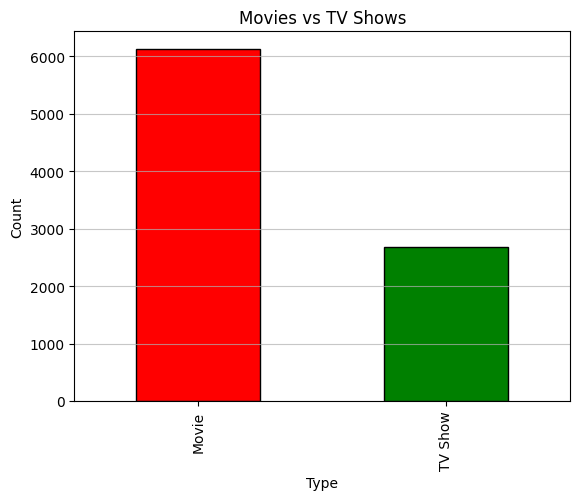

In [57]:
#Analysis:  How many Movies vs TV Shows?
typecount = df["type"].value_counts()
typecount.plot(kind = "bar", color = ["red", "Green"], edgecolor = "black")
plt.title("Movies vs TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.show()

In [59]:
print(df['rating'].unique())

# validating elements to used in next analysis
valid_cols = df[(df['rating'].notnull())& (df['release_year'].notnull()) & (df['type'] == 'Movie')]

# Create rating age groups
under_18 = ['G', 'TV-G', 'PG', 'TV-PG', 'PG-13', 'TV-14']
over_18 = ['R', 'TV-MA', 'NC-17']

# under 18 rows
under_18 = valid_cols[valid_cols['rating'].isin(under_18)]['release_year'].value_counts().sort_index()

# over 18 rows
over_18 = valid_cols[valid_cols['rating'].isin(over_18)]['release_year'].value_counts().sort_index()

['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' 'NR' 'TV-Y7-FV' 'UR']


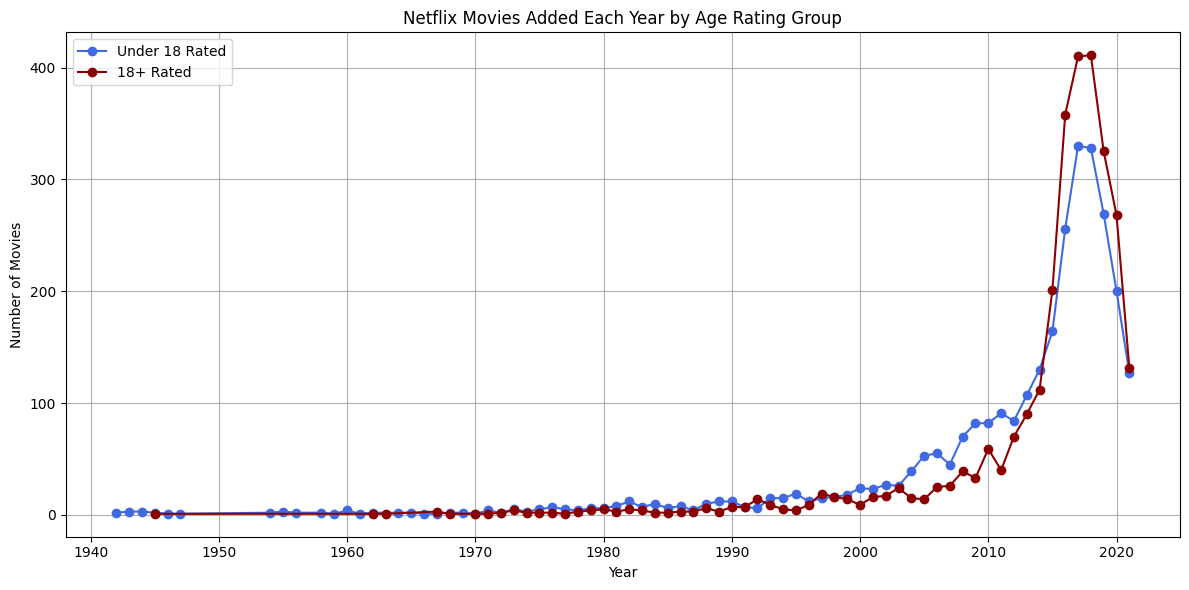

In [65]:
plt.figure(figsize=(12, 6))

# Plot Under 18
under_18.plot(label='Under 18 Rated', marker='o', color='royalblue')

# Plot Over 18
over_18.plot(label='18+ Rated', marker='o', color='darkred')

plt.title('Netflix Movies Added Each Year by Age Rating Group')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [66]:
print(valid_cols.shape)
print(valid_cols['rating'].unique())

(6126, 12)
['PG-13' 'PG' 'TV-MA' 'TV-PG' 'TV-14' 'TV-Y' 'R' 'TV-G' 'TV-Y7' 'G'
 'NC-17' 'NR' 'TV-Y7-FV' 'UR']
